**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

In [1]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, and reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets.

We will work with the first 'real' data sets in the next assignment.

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

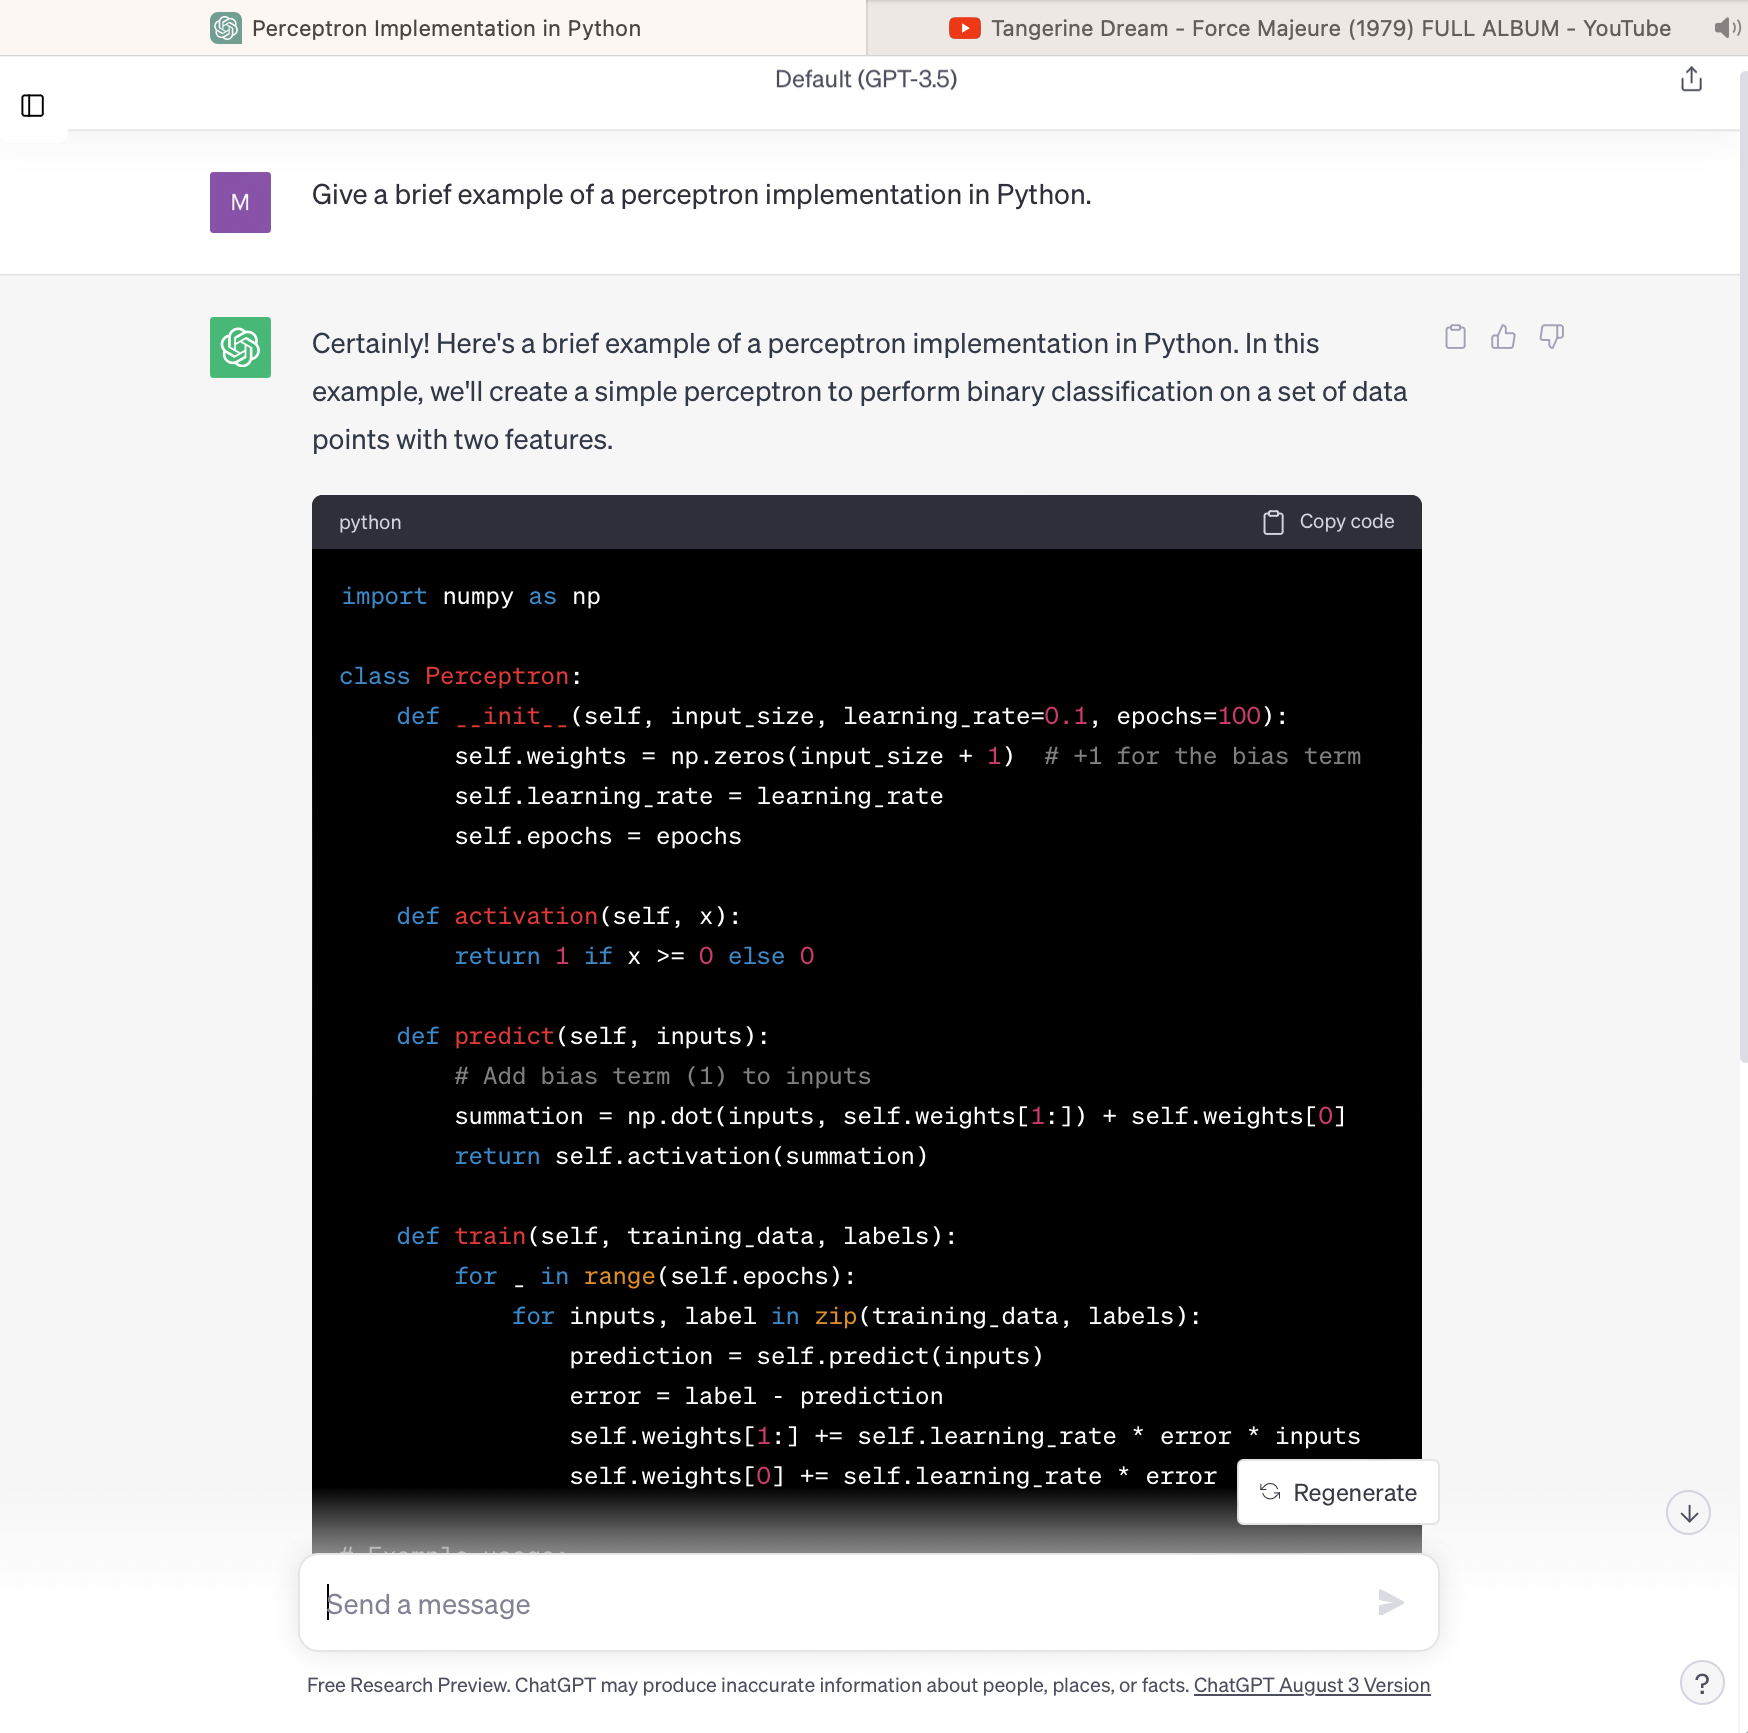

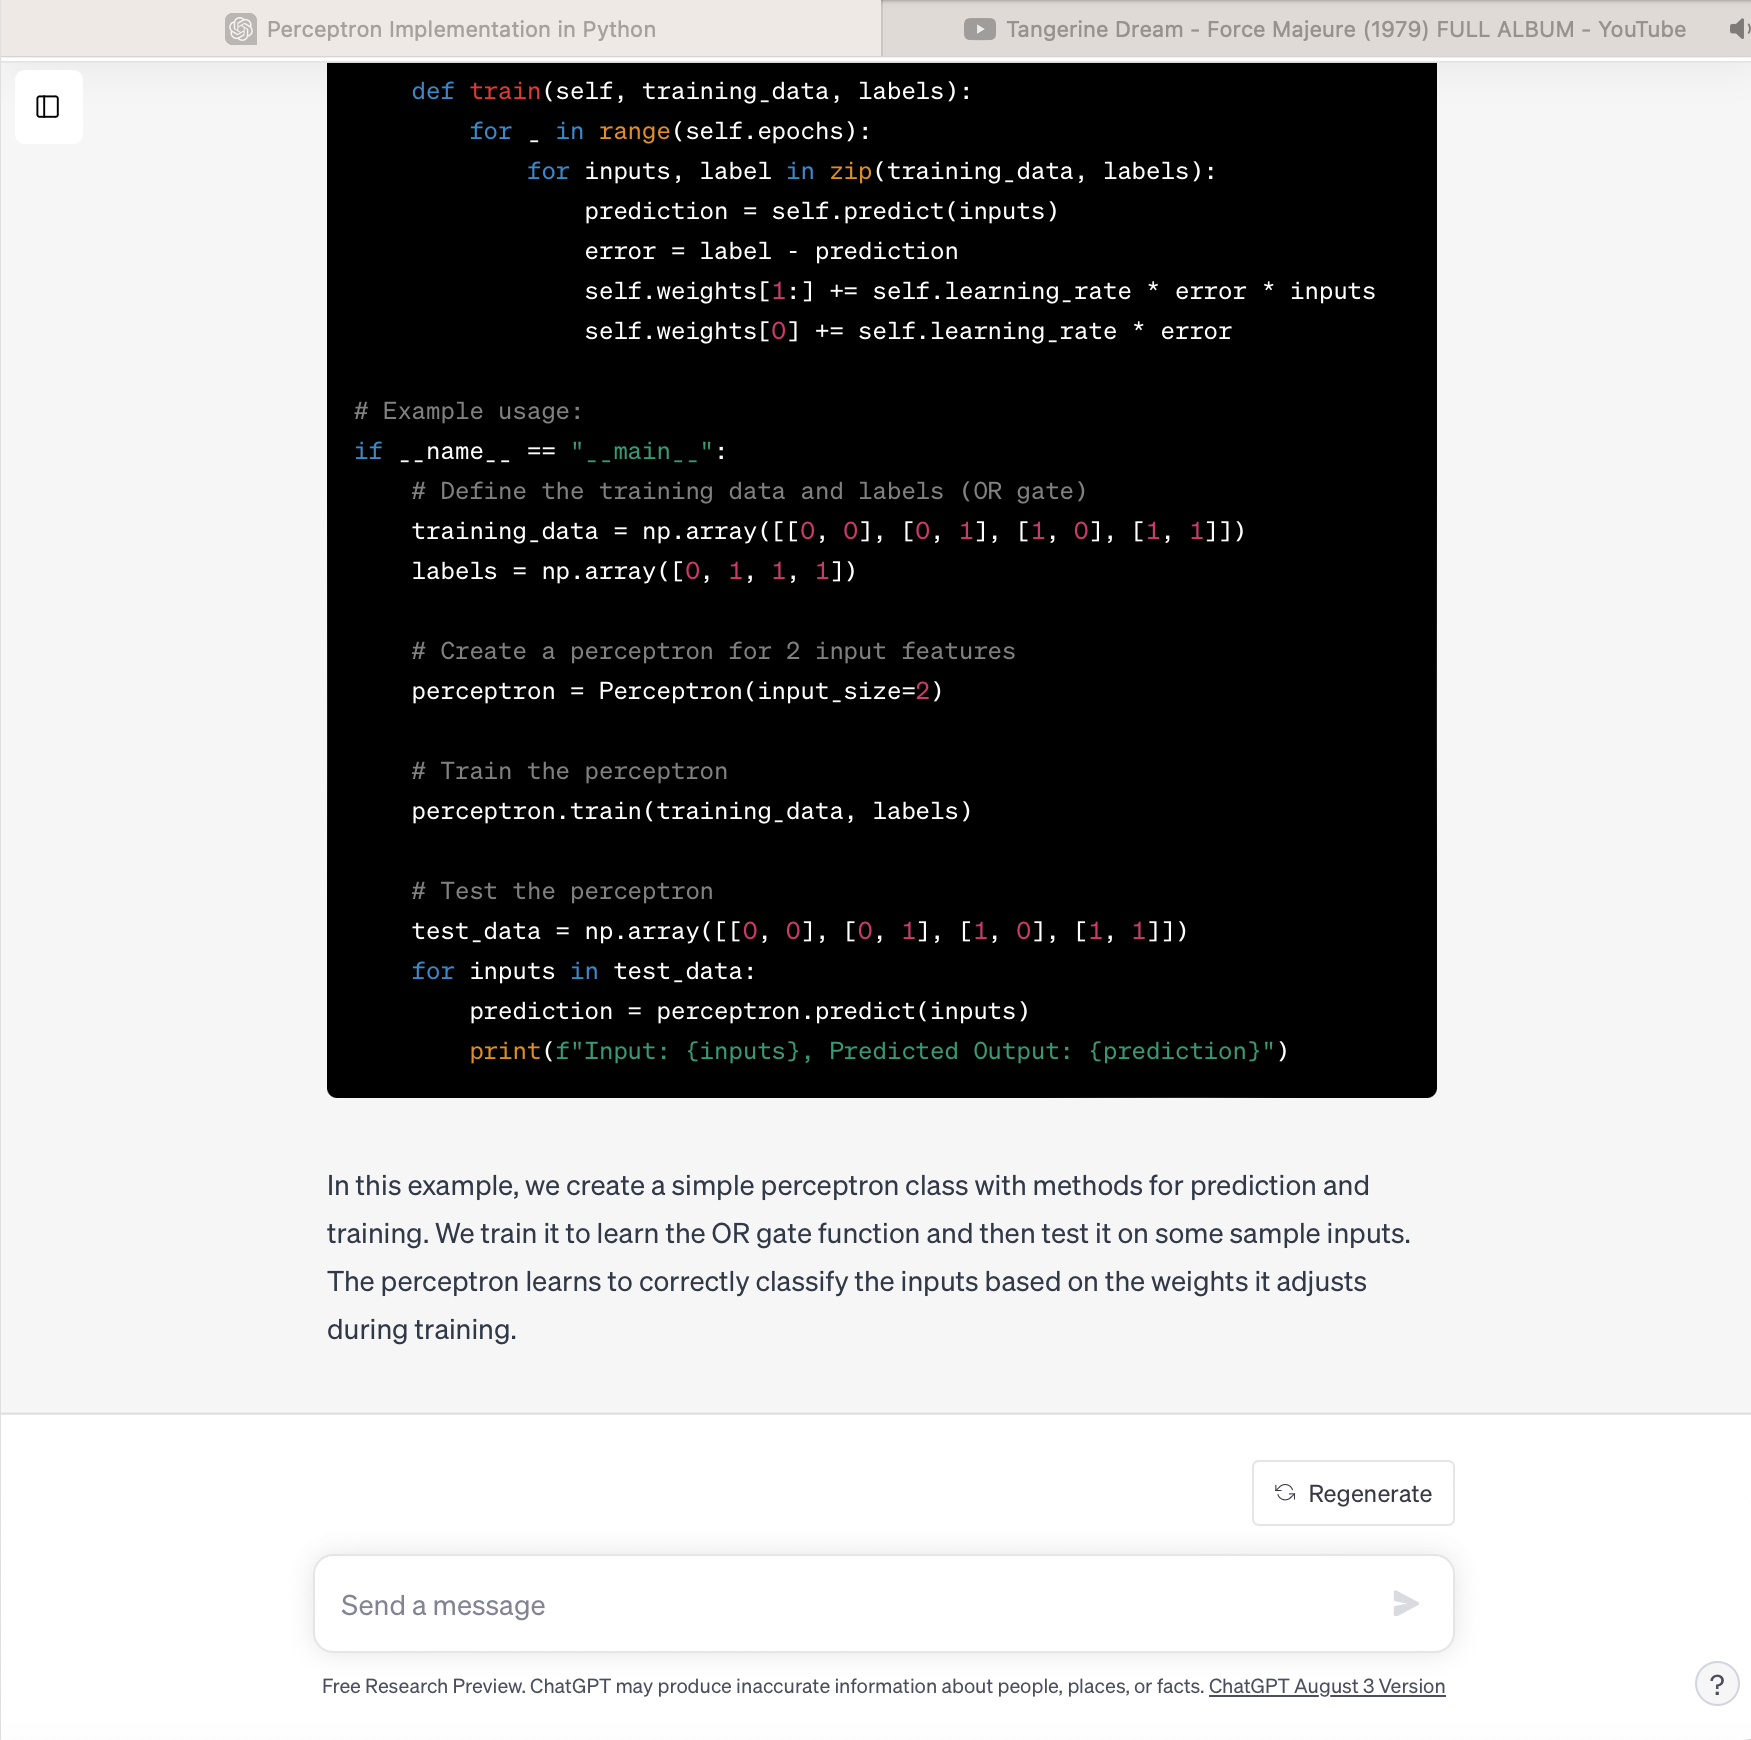

## **Preparation Steps**

In [2]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [3]:

# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


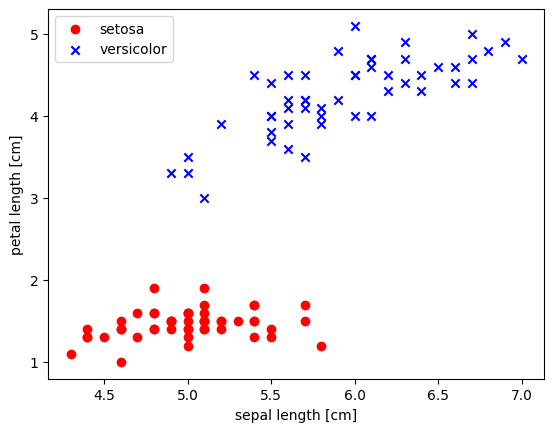

In [4]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [5]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

First, let's load a slightly modified version of the textbook's implementation of logistic regression with gradient descent.

In [6]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []



        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # Clip the values of 'output' to avoid divide-by-zero errors
            output = np.clip(output, 1e-10, 1 - 1e-10)

            # compute the logistic `loss`
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1).

- DO we need to make all points 1?

In [7]:
print(X[0:3])
print(y[0:3]) # currently is -1

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]
[-1 -1 -1]


In [8]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the logistic neuron are w0 = 0.1, w1 = -0.3, w2 = 0.2.

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code for polynomial regression from the Regression Code Notebook, generate $X_{d=2}$ and $X_{d=3}$.

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD*, fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta \leq 0.001$ and $n_{\mathit{iter}} \geq 1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*. Explain why your program produces the loss values you observe.

<font color = 'blue'> **Q1-4**.  </font> Copy the code for our class *LogisticRegressionGD* into a new cell, and modify so that it uses L2 regularization. (**Note:** You will need to update the parameter weight update rule for gradient descent.) Give your copy the new name *LogisticRegressionGDwithReg*, and make sure that every new line of code you add is clearly commented.

<font color = 'blue'> **Q1-5**.  </font>
Redo Q1-3 using *LogisticRegressionGDwithReg* with $\lambda\in\{0.0, 0.1,\ldots, 0.9\}$, for the same input choices and hyperparameter choices from Q1-3. For each case, report the loss function value and the norm of the weight parameter vector. What trends do you observe?

# Question 1.1

In [9]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def update_weights(w, X, y, eta):
    for x_i in X:
        z = np.dot(w, np.insert(x_i, 0, 1))  # Calculate net input
        y_hat = sigmoid(z)  # Prediction
        error = (y - y_hat)
        w += eta * error * np.insert(x_i, 0, 1 )  # Update weights
    return w


eta = 0.1
w = np.array([0.1, -0.3, 0.2])
X1 = X[0:3]
y1 = np.array([1,1,1]) # make it setosa
print(X1,y1)
# Update weights after processing each data point
w_updated = update_weights(w, X1, y1, eta)
print(f"Updated weights after processing data points: {w_updated}")


[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]] [1 1 1]
Updated weights after processing data points: [0.21813545 0.29086776 0.36379655]


In [10]:
# Initialize the LogisticRegressionGD model
lr = LogisticRegressionGD(eta=eta, n_iter=1, random_state=1)
lr.w_ = w
lr.fit(X1, y1)

# Get the updated weights from the model
weights_from_lr = lr.w_

print(f"Updated weights from LogisticRegressionGD:{weights_from_lr}")


Updated weights from LogisticRegressionGD:[0.16781472 0.7365965  0.20186961]


# Question 1.2

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures transformer for quadratic features (Xd=2)
poly_features_2 = PolynomialFeatures(degree=2)
Xd_2 = poly_features_2.fit_transform(X)
print(Xd_2[:3])

# PolynomialFeatures transformer for cubic features (Xd=3)
poly_features_3 = PolynomialFeatures(degree=3)
Xd_3 = poly_features_3.fit_transform(X)
print(Xd_3[:3])

[[ 1.    5.1   1.4  26.01  7.14  1.96]
 [ 1.    4.9   1.4  24.01  6.86  1.96]
 [ 1.    4.7   1.3  22.09  6.11  1.69]]
[[  1.      5.1     1.4    26.01    7.14    1.96  132.651  36.414   9.996
    2.744]
 [  1.      4.9     1.4    24.01    6.86    1.96  117.649  33.614   9.604
    2.744]
 [  1.      4.7     1.3    22.09    6.11    1.69  103.823  28.717   7.943
    2.197]]


# 1.3

In [12]:
# Initialize LogisticRegressionGD with specified learning rate and number of iterations
eta = 0.001
n_iter = 5000
lr_original = LogisticRegressionGD(eta=eta, n_iter=n_iter, random_state=1)
lr_quadratic = LogisticRegressionGD(eta=eta, n_iter=n_iter, random_state=1)
lr_cubic = LogisticRegressionGD(eta=eta, n_iter=n_iter, random_state=1)

# Fit the models to original data, quadratic data, and cubic data
lr_original.fit(X, y)
lr_quadratic.fit(Xd_2, y)
lr_cubic.fit(Xd_3, y)

# loss function for each model
loss_original = lr_original.loss_[-1]
loss_quadratic = lr_quadratic.loss_[-1]
loss_cubic = lr_cubic.loss_[-1]

print("Loss function value for original dataset (Xd=1):", loss_original)
print("Loss function value for quadratic features (Xd=2):", loss_quadratic)
print("Loss function value for cubic features (Xd=3):", loss_cubic)


Loss function value for original dataset (Xd=1): -382.8466511947313
Loss function value for quadratic features (Xd=2): -574.6867385936265
Loss function value for cubic features (Xd=3): -681.2743026586321


My observations:

1. Loss function for Xd1 is the loss value for the model trained on my original dataset which results in -382.8. This value is the total error of my model when I use original features.

2. Loss function for Xd2 is -574.7. By applying the quadratice features, the model has more chance to capture non-linear relationships which is causing my number to be lower compared to my value from Xd1.

3. Loss function for Xd3 is -681.3. When I apply the model on cubic features of the dataset this increases the chance of capturing non-linear relationships which is why this value is lower compared to the original dataset and quadractic dataset.

As I incrase the dataset from orginal to quadractice to cubic the likelihood of finding non-linear relationships increase lowering the loss value because the model is becoming better at fitting the data.

# 1.4


In [13]:
class LogisticRegressionGDwithReg(object):
    """Logistic Regression Classifier using gradient descent with L2 regularization.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    lambda_reg : float
      Regularization parameter for L2 regularization.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, lambda_reg=0.0, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.lambda_reg = lambda_reg
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            #!!! this is the fix
            # Update weights with L2 regularization
            self.w_[1:] += self.eta * (X.T.dot(errors) - 2*self.lambda_reg * self.w_[1:])
            self.w_[0] += self.eta * errors.sum()

            # Clip the values of 'output' to avoid divide-by-zero errors
            output = np.clip(output, 1e-10, 1 - 1e-10)

            # compute the logistic `loss` with regularization term
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) + \
                   (self.lambda_reg / 2) * np.sum(self.w_[1:] ** 2)
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


# 1.5

Lambda = 0.0: Loss = -382.8466511947313, Weight Norm = 417.5293633976608
Lambda = 0.1: Loss = 2947.109874131903, Weight Norm = 270.75718558704364
Lambda = 0.2: Loss = 2696.358922449324, Weight Norm = 193.58992379875676
Lambda = 0.3: Loss = 2044.5313512642056, Weight Norm = 151.08755658413546
Lambda = 0.4: Loss = 1492.9662148955804, Weight Norm = 126.44815167433781
Lambda = 0.5: Loss = 1096.822656999323, Weight Norm = 111.34200414721623
Lambda = 0.6: Loss = 817.9032294578975, Weight Norm = 101.53741273193616
Lambda = 0.7: Loss = 608.7835378383451, Weight Norm = 94.81965092106066
Lambda = 0.8: Loss = 444.9907245020996, Weight Norm = 89.97996103020189
Lambda = 0.9: Loss = 313.9401644076313, Weight Norm = 86.33333988798594


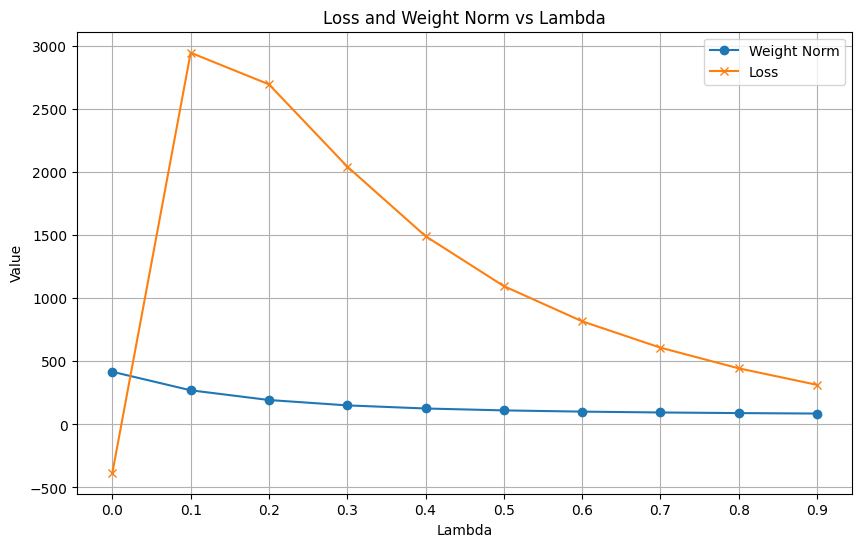

In [14]:
  # parameters
eta = 0.001
n_iter = 5000
lambda_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# storing values
loss_values = []
weight_norms = []

for lambda_val in lambda_values:
    lr = LogisticRegressionGDwithReg(eta=eta, n_iter=n_iter, lambda_reg=lambda_val, random_state=1)

    # Fit the model to datasets
    lr.fit(X, y)
    loss_values.append(lr.loss_[-1])
    weight_norms.append(np.linalg.norm(lr.w_))


for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda = {lambda_val:.1f}: Loss = {loss_values[i]}, Weight Norm = {weight_norms[i]}")

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, weight_norms, label="Weight Norm", marker='o')
plt.plot(lambda_values, loss_values, label="Loss", marker='x')
plt.xlabel("Lambda")
plt.ylabel("Value")
plt.title("Loss and Weight Norm vs Lambda")
plt.grid(True)
plt.legend()
plt.xticks(lambda_values)
plt.show()




Lambda = 0.0: Loss = -574.6867385936265, Weight Norm = 2704.945622925745
Lambda = 0.1: Loss = 145281.7097985623, Weight Norm = 1712.303795630423
Lambda = 0.2: Loss = 135856.18834555647, Weight Norm = 1174.3757457812933
Lambda = 0.3: Loss = 109251.99967668825, Weight Norm = 864.3036752816033
Lambda = 0.4: Loss = 87334.27039083802, Weight Norm = 674.0779036405426
Lambda = 0.5: Loss = 71417.76265831647, Weight Norm = 550.2720614855594
Lambda = 0.6: Loss = 59933.50088969226, Weight Norm = 465.31368031291476
Lambda = 0.7: Loss = 51452.42399828646, Weight Norm = 404.3081463280743
Lambda = 0.8: Loss = 44999.47613543008, Weight Norm = 358.81899097786913
Lambda = 0.9: Loss = 39948.26154430057, Weight Norm = 323.8366586434792


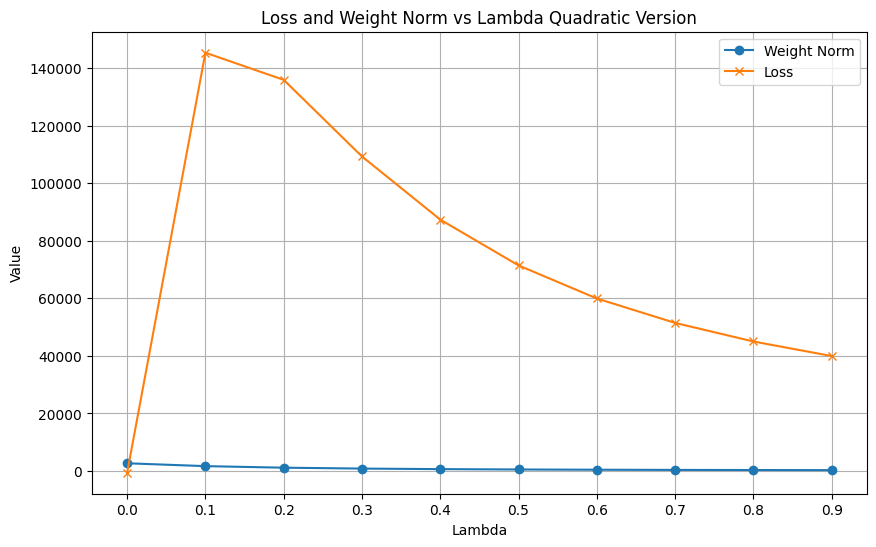

In [15]:
  # parameters
eta = 0.001
n_iter = 5000
lambda_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# storing values
loss_values = []
weight_norms = []

for lambda_val in lambda_values:
    lr_quad = LogisticRegressionGDwithReg(eta=eta, n_iter=n_iter, lambda_reg=lambda_val, random_state=1)

    # Fit the model to datasets
    lr_quad.fit(Xd_2, y)
    loss_values.append(lr_quad.loss_[-1])
    weight_norms.append(np.linalg.norm(lr_quad.w_))

for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda = {lambda_val:.1f}: Loss = {loss_values[i]}, Weight Norm = {weight_norms[i]}")


plt.figure(figsize=(10, 6))
plt.plot(lambda_values, weight_norms, label="Weight Norm", marker='o')
plt.plot(lambda_values, loss_values, label="Loss", marker='x')
plt.xlabel("Lambda")
plt.ylabel("Value")
plt.title("Loss and Weight Norm vs Lambda Quadratic Version")
plt.grid(True)
plt.legend()
plt.xticks(lambda_values)
plt.show()



Lambda = 0.0: Loss = -681.2743026586321, Weight Norm = 14931.73715218251
Lambda = 0.1: Loss = 4452741.2662801, Weight Norm = 9438.7219783813
Lambda = 0.2: Loss = 4165073.622358382, Weight Norm = 6455.90298661803
Lambda = 0.3: Loss = 3352798.3448130083, Weight Norm = 4730.5017996912175
Lambda = 0.4: Loss = 2683566.523549377, Weight Norm = 3666.379564830361
Lambda = 0.5: Loss = 2197560.5222544163, Weight Norm = 2968.845391701144
Lambda = 0.6: Loss = 1846880.0834166121, Weight Norm = 2485.882763625815
Lambda = 0.7: Loss = 1587904.1776529686, Weight Norm = 2135.386224498887
Lambda = 0.8: Loss = 1390929.308200105, Weight Norm = 1870.8497104183393
Lambda = 0.9: Loss = 1236816.6261473664, Weight Norm = 1664.6540026743364


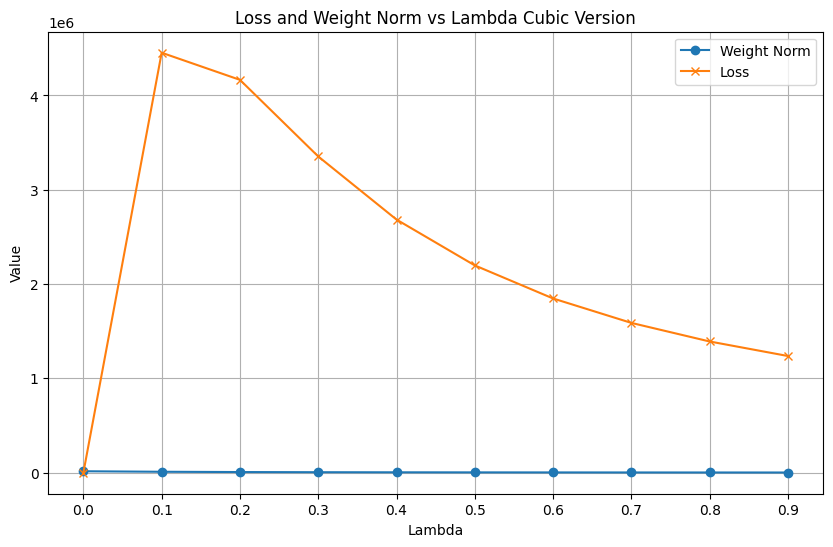

In [16]:
  # parameters
eta = 0.001
n_iter = 5000
lambda_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# storing values
loss_values = []
weight_norms = []

for lambda_val in lambda_values:
    lr_cubic = LogisticRegressionGDwithReg(eta=eta, n_iter=n_iter, lambda_reg=lambda_val, random_state=1)

    # Fit the model to datasets
    lr_cubic.fit(Xd_3, y)
    loss_values.append(lr_cubic.loss_[-1])
    weight_norms.append(np.linalg.norm(lr_cubic.w_))


for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda = {lambda_val:.1f}: Loss = {loss_values[i]}, Weight Norm = {weight_norms[i]}")


plt.figure(figsize=(10, 6))
plt.plot(lambda_values, weight_norms, label="Weight Norm", marker='o')
plt.plot(lambda_values, loss_values, label="Loss", marker='x')
plt.xlabel("Lambda")
plt.ylabel("Value")
plt.title("Loss and Weight Norm vs Lambda Cubic Version")
plt.grid(True)
plt.legend()
plt.xticks(lambda_values)
plt.show()


My observations:

What I observed in these 3 graphs. If I change the parameter of iterations the weight goes up. If I change the value of the learning rate the values of the loss function are smaller. The differences between normal, quadratic, and cubic is that the weight grows slightly larger but the loss function values grow exponentially in comparison.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [17]:
# your calculations and code go here

In [18]:
# Grader's area

maxScore = maxScore +4
#M[1,1] =

maxScore = maxScore +4
#M[1,2] =

maxScore = maxScore +4
#M[1,3] =

maxScore = maxScore +4
#M[1,4] =

maxScore = maxScore +4
#M[1,5] =

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question Q1-3.

<br>

Suppose that $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$, where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [**Note:** as with anything else, feel free to discuss this on Canvas.]

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

(your answer goes here)

# Question 2

# was looking at the lecture recording. I need to find the optimal loss value. Lowest possible value.

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating sample data
np.random.seed(42)
X_q2 = np.random.rand(100, 1) * 1  # Random data
y_q2 = 2 * X_q2[:, 0] + 3 + np.random.randn(100)  # Linear relationship with noise
print(X_q2[:3],'\n',y_q2[:3], '\n')

# quadratic features
X2_q2 = np.hstack((X_q2, X_q2**2))

# Fitting models
f1 = LinearRegression().fit(X_q2, y_q2)
f2 = LinearRegression().fit(X2_q2, y_q2)

# Calculating loss function values
y_pred_f1 = f1.predict(X_q2)
y_pred_f2 = f2.predict(X2_q2)
loss_f1 = mean_squared_error(y_q2, y_pred_f1)
loss_f2 = mean_squared_error(y_q2, y_pred_f2)

print("Loss function value for f1:", loss_f1)
print("Loss function value for f2:", loss_f2)


[[0.37454012]
 [0.95071431]
 [0.73199394]] 
 [3.83612731 4.60242126 4.55574866] 

Loss function value for f1: 0.8065845639670535
Loss function value for f2: 0.7771936663502369


If we have the loss function as L(f, X, y), where f is the the model, X is the data feature matrix, and y is the true labels we can use F1 and F2.

For F1 we can write L(F1, X, y) = Minimum Loss
  - L(F1, X, y) = Min_z1 L(F1(z1), X, y)

For F2 we can write L(F2, X_q2, y) >= L(F1, X, y)
  - L(F2, X_q2, y) >= Min_z2 L(F2(z2), X_q2, y)

Now to prove this is true we can use a varaible z (theta) to be the parameter for the dataset X and z^2 to be the parameter for dataset X_q2. Because F2 has more flexibility from the quadratic features it will have a loss value that is equal to or higher then the optimal loss by F1. This is shown in question 1 where we see the differences between the loss value from X to Xd_2 and Xd_3. However in the example code above we cannot prove this method because F1 and F2 need to **Optimaly fit the data** in order to prove this theory correct. We can never show that MSE for F1 will be equal to MSE for F2 unless we use data in a perfect world setting. In a real world setting we can prove that the MSE will be lower than F1. Since this is a theory we cannot create a method to have the models predict.

In [20]:
# Grader's area

maxScore = maxScore + 4
#M[2,1] =


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **no**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br>

**a.** the data set is linearly separable, and  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes - that is, it has a very big margin with respect to one of the two classes, and a very small margin with respect to the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the Iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from Question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

**Hint**: Try small datasets. <br>
**Note**: It's best to use fresh variables for your dataset, since the previous values of $X,y$ will be reused in Question 4.


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [21]:
# your answers go here

# Question 3.1

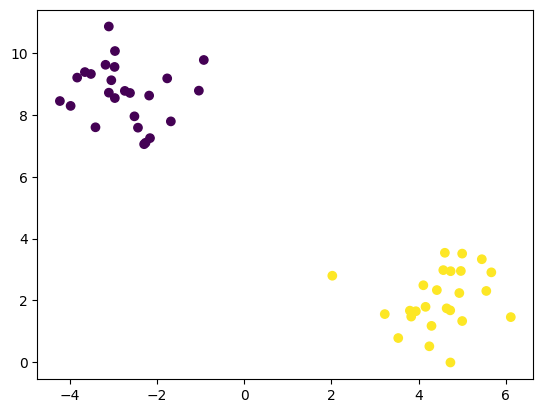

In [22]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create dataset
X_new, y_new = make_blobs(n_samples=50, centers=2, random_state=42)


# Plot dataset
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new)
plt.show()


# Question 3.2

In [23]:
# # Define the logistic function
# def logistic(z):
#     return 1 / (1 + np.exp(-z))

# Set learning rate and number of iterations
eta = 0.5
n_iter = 1000

# Instantiate LogisticRegressionGD
lr_q3 = LogisticRegressionGD(eta=eta, n_iter=n_iter, random_state=1)

# Fit the model to your data
lr_q3.fit(X_new, y_new)

# Access the optimal weights
optimal_weights = lr_q3.w_
print(optimal_weights)
# Calculate the loss function value
loss_value = lr_q3.loss_[-1]
print(loss_value)

[  2.57545114  50.42494849 -34.2279803 ]
0.0001553298590220884


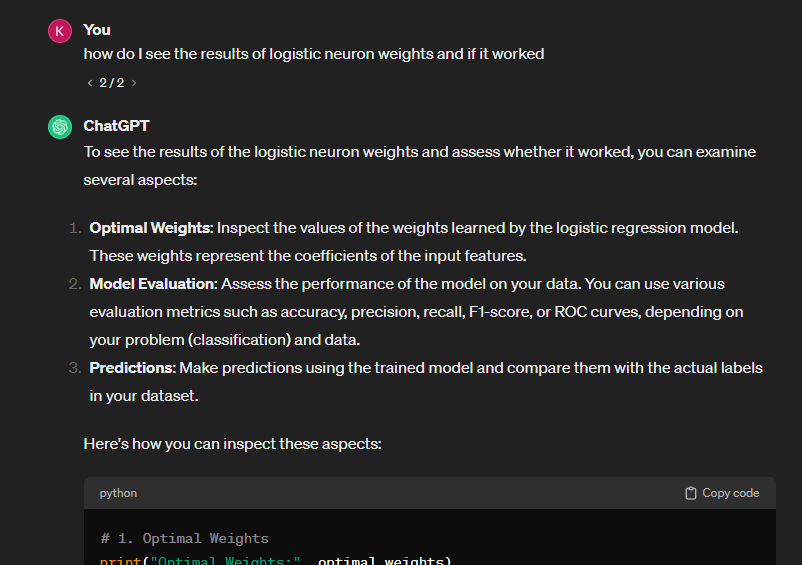

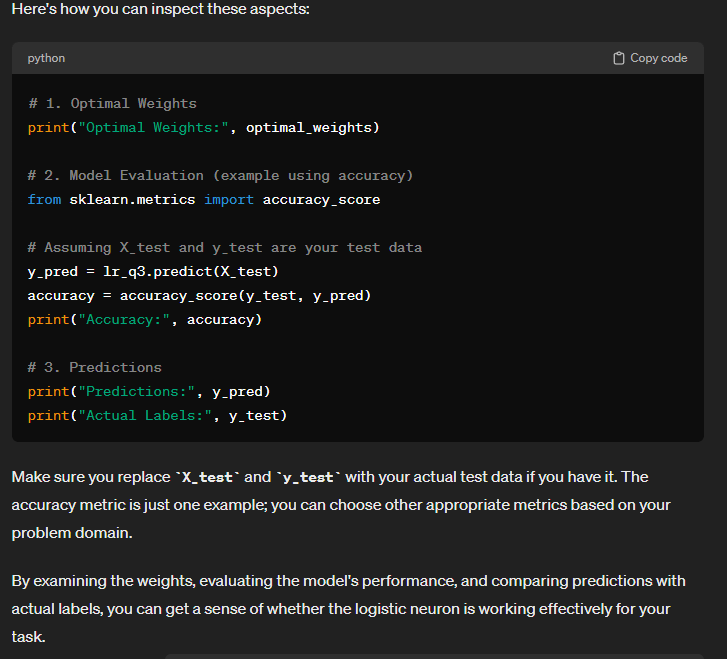

In [24]:
# 1. Optimal Weights
print("Optimal Weights:", optimal_weights)

# 2. Model Evaluation (example using accuracy)
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test data
y_pred = lr_q3.predict(X_new)
accuracy = accuracy_score(y_new, y_pred)
print("Accuracy:", accuracy)

# 3. Predictions
print("Predictions:", y_pred)
print("Actual Labels:", y_new)


Optimal Weights: [  2.57545114  50.42494849 -34.2279803 ]
Accuracy: 1.0
Predictions: [1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 0]
Actual Labels: [1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 0]


# Question 3.3

<ipython-input-5-f03d03a89cdf>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


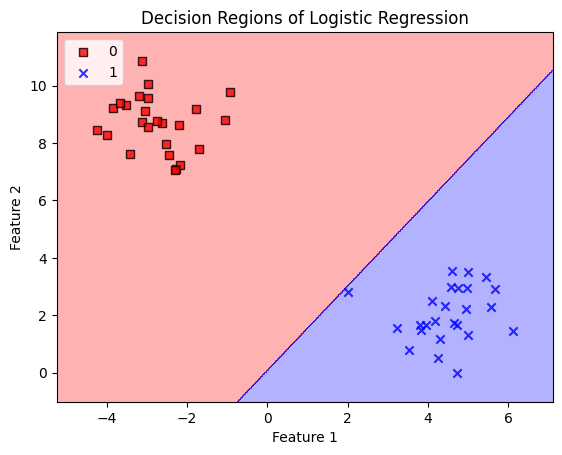

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Optimal weights: [  2.57545114  50.42494849 -34.2279803 ]


In [25]:
plot_decision_regions(X_new, y_new, classifier=lr_q3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of Logistic Regression')
plt.legend(loc='upper left')
plt.show()

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr_q3.predict(X_new)
accuracy = accuracy_score(y_new, y_pred)
report = classification_report(y_new, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Inspect the weights
print("Optimal weights:", optimal_weights)


This graph above is unfair because the line is closer to the blue cluster and not direct in the center

In [26]:
# Grader's area

maxScore = maxScore + 12
#M[3,1] =
#M[3,2] =
#M[3,3] =


<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [27]:
# your answer goes here

# Question 3.4

Accuracy: 1.0


<ipython-input-5-f03d03a89cdf>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


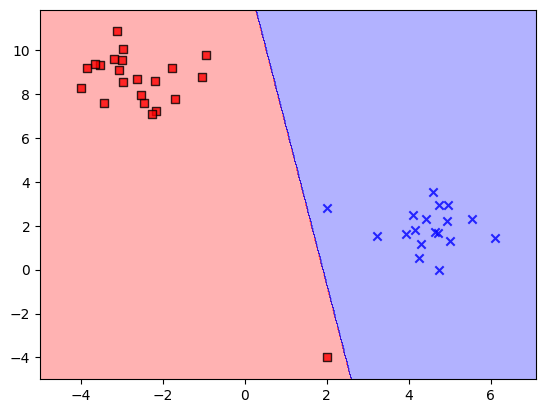

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# # Generate a linearly separable dataset with increased separation between classes
# X_new2, y_new2 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
#                                       n_clusters_per_class=1, flip_y=0, class_sep=2, random_state=42)

X_new[5] = [2, -4]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Fit logistic regression model with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary
plot_decision_regions(X_train, y_train, classifier=log_reg)


This graph above is a fail of logistic regression because the line is not between the 2 clusters. The point on the bottom red is causing the shift of the regression to fail. The direction of the line is also not another reason that this is a failed logistic regression.

In [29]:
# Grader's area
maxScore = maxScore + 4

# M[3,4] =

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in the above cells is linearly separable.

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization (that is, incentivizes very small slacks).

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$: let $s = \|w\|_2$.
[Hint: Read the documentation in order to access the coefficients.]

<font color = 'blue'> **Q4-3.** </font> Set $w \leftarrow w/s$ and $b\leftarrow b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values; let $\gamma$ be the smallest of these in absolute value. This $\gamma$ is the margin. (In fact, there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$.)


**Note:** as with anything else, feel free to discuss this on Canvas.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

# Question 4.1

Coefficients (weights): [[-0.95716006  2.07912485]]
Intercept (bias): [-0.3559689]


<ipython-input-5-f03d03a89cdf>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


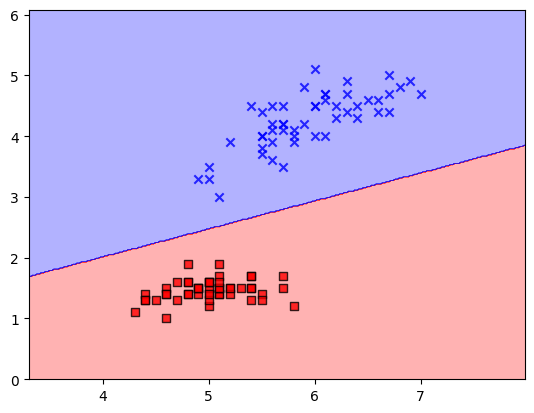

In [30]:
# from sklearn.svm import LinearSVC

# # Define and train the LinearSVC model with C=1
# clf = LinearSVC(C=1, loss='hinge', random_state=42)
# clf.fit(X, y)

from sklearn.svm import LinearSVC

# Initialize LinearSVC with a low value of C to reduce regularization
# Here, we set C=0.1
svm = LinearSVC(C=1000, loss='hinge')#if I change the c it changes the results in the other parts

# Fit the model to the data
svm.fit(X, y)

# Print the coefficients (weights) and intercept (bias)
print("Coefficients (weights):", svm.coef_)
print("Intercept (bias):", svm.intercept_)

plot_decision_regions(X, y, svm)

# Question 4.2

In [31]:
import numpy as np

# Extract coefficients and intercept from the learned SVC
w = svm.coef_[0]
b = svm.intercept_[0]

# Calculate the 2-norm of w
s = np.linalg.norm(w)

print("Coefficients (weights):", w)
print("Intercept (bias):", b)
print("2-norm of w:", s)


Coefficients (weights): [-0.95716006  2.07912485]
Intercept (bias): -0.3559689013017696
2-norm of w: 2.2888677377351994


# Question 4.3

In [32]:
# Rescale the coefficients and intercept
w_scaled = w / s
b_scaled = b / s

print("Scaled Coefficients (weights):", w_scaled)
print("Scaled Intercept (bias):", b_scaled)


Scaled Coefficients (weights): [-0.41818059  0.90836391]
Scaled Intercept (bias): -0.15552183091802219


# Question 4.4

In [33]:
# Calculate w^T x - b for each point x in the original dataset X
#margin_values_minusb = np.abs(np.dot(X, w_scaled.T) - b_scaled)
margin_values_plusb = np.abs(np.dot(X, w_scaled.T) + b_scaled) # fixed this because it was mentioned on canvas to just use + b

# Find the smallest absolute value among the calculated margins
#gamma_minus = np.min(margin_values_minusb)
gamma_plus = np.min(margin_values_plusb)

#print("Margin (gamma):", gamma_minus)
print("Margin (gamma):", gamma_plus)

Margin (gamma): 0.43684888233768415


In [34]:
# Grader's area

maxScore = maxScore + 16
#M[4,1] =
#M[4,2] =
#M[4,3] =
#M[4,4] =


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use the margin $\gamma$ as calculated in Question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it. (Feel free to share your calculated value of $\gamma$ on Canvas, or to ask your peers to share theirs.)

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} \|x\|_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm.

<font color = 'blue'> **Q5-2.** </font> Calculate $\mathit{maxErrors} = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences.

<font color = 'blue'> **Q5-3.** </font> Compare $\mathit{maxErrors}$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from Assignment 2, or anything else that can provide you with that number].  


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [35]:
# your answers go here

# Question 5.1

In [36]:
# Calculate the 2-norm (Euclidean norm) of each point in the dataset
norms = np.linalg.norm(X, axis=1)

# Find the maximum norm among all points
R = np.max(norms)

print("R (maximum 2-norm):", R)


R (maximum 2-norm): 8.462860036654275


# Question 5.2

In [37]:
# Calculate maxErrors
maxErrors = R / (gamma_plus ** 2)

print("maxErrors:", maxErrors)


maxErrors: 44.34602530617052


# Question 5.3

In [38]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.n_iterations_ = 0 #this keeps track of iterations
        self.weights_history_ = [] # keeps list of weight history
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #update = self.eta * (self.predict(xi) - target) # this is the error
                update = self.eta * (target - self.predict(xi)) # This is the correected result
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors) #adds error into error list
            self.n_iterations_ += 1 #adds number of iterations in iterations list
            self.weights_history_.append(self.w_.copy()) #adds weight of history

            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

            if errors == 0: # Stop when no more errors
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [39]:
# Initialize Perceptron
perceptron = Perceptron()

# Train Perceptron
perceptron.fit(X, y)

# Assuming perceptron is the trained perceptron model
errors = perceptron.errors_

# Print the errors at each iteration/epoch
print("Errors at each iteration/epoch:", errors)

# Total number of errors encountered during training
total_errors = errors[-1]
print("Total number of errors:", total_errors)



errors2 = perceptron.errors_

print("maxErrors:", maxErrors)

Errors at each iteration/epoch: [1, 3, 3, 2, 1, 0]
Total number of errors: 0
maxErrors: 44.34602530617052


In [40]:
# Grader's area

maxScore = maxScore + 12
#M[5,1] =
#M[5,2] =
#M[5,3] =



----------------------------
----------------------------
----------------------------

In [41]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore